# Analisi dell'impatto ambientale della produzione di cibi e mangimi
### In base ai dati raccolti dall' Organizzazione delle Nazioni Unite capiremo quali sono gli alimenti che richiedono più risorse naturali in modo tale da poter spostare il focus produttivo su alimenti più sostenibili per l'ambiente.

In [281]:
import sys
!{sys.executable} -m pip install --upgrade pip

try:
     import numpy as np
except ModuleNotFoundError as MNF:
     print("########## numpy non trovato lo installo")
     !{sys.executable} -m pip install numpy
finally:
     import numpy as np
     print("##########   ########## numpy installato ed importato")
     
try:
     import pandas as pd
except ModuleNotFoundError:
     print("########## pandas non trovato lo installo")
     !{sys.executable} -m pip install pandas
finally:
     import pandas as pd
     print("##########   ########## pandas installato ed importato")
     
try:
     import matplotlib.pyplot as plt
except ModuleNotFoundError:
     print("########## matplotlib non trovato lo installo")
     !{sys.executable} -m pip install matplotlib
finally:
     import matplotlib.pyplot as plt
     print("##########   ########## matplotlib installato ed importato")

try:
     import seaborn as sns
except ModuleNotFoundError:
     print("########## seaborn non trovato lo installo")
     !{sys.executable} -m pip install seaborn
finally:
     import seaborn as sns
     print("##########   ########## seaborn installato ed importato")

try:
     import plotly.express as px
except ModuleNotFoundError:
     print("########## plotly non trovato lo installo")
     !{sys.executable} -m pip install plotly
finally:
     import plotly.express as px
     print("##########   ########## plotly installato ed importato")


FAO_df = pd.read_csv("data/FAO.csv", encoding='latin-1')
Food_Production_df = pd.read_csv("data/Food_Production.csv")
FAO_df["Type"] = ""

##########   ########## numpy installato ed importato
##########   ########## pandas installato ed importato
##########   ########## matplotlib installato ed importato
##########   ########## seaborn installato ed importato
##########   ########## plotly installato ed importato


# Datasets

#### Visualizzeremo i primi record dei datasets

In [282]:
FAO_df.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Type
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895,
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422,
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360,
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89,
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200,


In [283]:
Food_Production_df.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


#### Abbiamo rispettivamente un dataset che ci da informazioni sulle quantità prodotte e un datasets che ci da informazioni rigurado l'inquinamento.

# Colonne del primo dataset
#### Del primo dataset andremo a considerare le seguenti colonne:
- **Area Abbreviation -> Abbreviazione dell'area**
- **Area -> Area scritta per esteso**
- **Item -> Prodotto**
- **Element -> Mangime o Cibo**
- **Unit -> Unità di misura per la produzione**
- **Tutte le colonne che iniziano con Y -> Quanto è stato prodotto ogni anno**

In [284]:
# Selezione delle colonne del primo dataset
colonne_interessate = ["Area Abbreviation", "Area", "Area Code", "Item", "Element", "Unit", "Type"]
FAO_df_colonne_interessate = [ colonna for colonna in FAO_df.columns if colonna.startswith("Y") or (colonna in colonne_interessate)]
FAO_df[FAO_df_colonne_interessate].head()

,Area Abbreviation,Area Code,Area,Item,Element,Unit,Y1961,Y1962,Y1963,Y1964,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Type
0,AFG,2,Afghanistan,Wheat and products,Food,1000 tonnes,1928.0,1904.0,1666.0,1950.0,...,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895,
1,AFG,2,Afghanistan,Rice (Milled Equivalent),Food,1000 tonnes,183.0,183.0,182.0,220.0,...,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422,
2,AFG,2,Afghanistan,Barley and products,Feed,1000 tonnes,76.0,76.0,76.0,76.0,...,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360,
3,AFG,2,Afghanistan,Barley and products,Food,1000 tonnes,237.0,237.0,237.0,238.0,...,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89,
4,AFG,2,Afghanistan,Maize and products,Feed,1000 tonnes,210.0,210.0,214.0,216.0,...,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200,


# Estrapolazione degli alimenti il cui inquinamento è tracciato


##### Bisogna andare a prendere i cibi ed i mangimi di cui abbiamo informazioni nei datasets e bisogna aggiustare alcune righe poichè ci sono alcuni record che hanno 2 prodotti come ad esempio Wheat & Rye che sono unificati.

In [285]:
cibi = Food_Production_df["Food product"]
# Adattamento per favorire l'incrocio dati
cibi_temp = list()
for cibo in cibi:
     if "Beef" not in cibo:
          split = cibo.split('&')
          cibi_temp.append(str.strip(split[0]))
          if len(split) > 1:
               cibi_temp.append(str.strip(split[1]))
cibi_temp.sort()
cibi = pd.Series(cibi_temp)


# Incorcio dei dati
#### L'incrocio dei dati porterà ad una diminuzione del campione il che è naturale poichè non vengono tracciati tutti i cibi che ci sono nel dataset delle Nazioni Unite.

In [286]:
# Funzione per incrocio dati
def incrocio_dati(df, cibi, prodotti_tracciati, colonne) -> None:
     for index, record in FAO_df[FAO_df_colonne_interessate].iterrows():
          food_type = record["Item"].lower()
          # Caso del dizionario
          if(isinstance(cibi, dict)):
               for key in cibi.keys():
                    if food_type.startswith(cibi[key].lower()) and index not in prodotti_tracciati:
                         prodotti_tracciati.append(index)
                         FAO_df.at[index, "Type"] = key
          # Caso lista/pd.series.Series
          elif(isinstance(cibi, pd.core.series.Series) or isinstance(cibi, list)):
               for i in range(len(cibi)):
                    if food_type.startswith(cibi[i].lower()) and index not in prodotti_tracciati:
                         prodotti_tracciati.append(index)
                         FAO_df.at[index, "Type"] = cibi[i]
          # Caso di un tipo non permesso
          else:
               print("No type encoded")


In [287]:
# Inserimento nel df in base al tipo di alimento(pt.1)
prodotti_tracciati = list()
incrocio_dati(FAO_df, cibi, prodotti_tracciati, colonne_interessate)
print("Numero di prodotti tracciati: ", len(prodotti_tracciati))

Numero di prodotti tracciati:  4369


# Dati non presi
#### Alcuni dati non sono stati presi a causa della differente nomenclatura tra i datasets in particolare: 
- **Beet Sugar**
- **Cane Sugar**
- **Citrus Fruit**
- **Fish (farmed)**
- **Other Fruit**
- **Other Pulses**
- **Other Vegetable**
- **Pig Meat**
- **Sunflower Oil**

#### Effettuerò delle modifiche alle nomenclature al fine di estrapolarli.

In [288]:
colonne_dict = {
     'Beet Sugar': 'sugar beet',
     'Cane Sugar': 'sugar cane',
     'Citrus Fruit': 'citrus',
     'Fish (farmed)': 'fish',
     'Other Fruit': 'fruits, other',
     'Other Pulses': 'pulses, other and product',
     'Other Vegetables': 'vegetables, other',
     'Pig Meat': 'pigmeat',
     'Beef (beef herd)': 'bovine meat'
}

incrocio_dati(FAO_df, colonne_dict, prodotti_tracciati, colonne_interessate)
print("Numero di prodotti tracciati: ", len(prodotti_tracciati))


Numero di prodotti tracciati:  6483


# Creazione del dataset 

In [289]:
prodotti_tracciati_df = FAO_df.iloc[prodotti_tracciati]
prodotti_tracciati_df = prodotti_tracciati_df[FAO_df_colonne_interessate].reset_index().drop(columns=['index'])
prodotti_tracciati_df.head()


,Area Abbreviation,Area Code,Area,Item,Element,Unit,Y1961,Y1962,Y1963,Y1964,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Type
0,AFG,2,Afghanistan,Wheat and products,Food,1000 tonnes,1928.0,1904.0,1666.0,1950.0,...,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895,Wheat
1,AFG,2,Afghanistan,Rice (Milled Equivalent),Food,1000 tonnes,183.0,183.0,182.0,220.0,...,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422,Rice
2,AFG,2,Afghanistan,Potatoes and products,Food,1000 tonnes,111.0,97.0,103.0,110.0,...,294.0,294.0,260.0,242.0,250.0,192.0,169.0,196,230,Potatoes
3,AFG,2,Afghanistan,Nuts and products,Food,1000 tonnes,2.0,3.0,1.0,1.0,...,13.0,24.0,34.0,42.0,28.0,66.0,71.0,70,44,Nuts
4,AFG,2,Afghanistan,Palm Oil,Food,1000 tonnes,0.0,0.0,0.0,0.0,...,69.0,56.0,51.0,36.0,53.0,59.0,51.0,61,64,Palm Oil


# Pulizia dei dati
#### All'interno dei dati incrociati potremmo avere dei valori nulli che sporcano i dati, effettueremo quindi una pulizia dei dati. Verranno prima divisi per categoria e poi puliti.

In [290]:
# Dizionario alimento => sub_df
alimenti_dict = dict()
keys = cibi.to_list()

for i in range(len(keys)):
     if keys[i] in colonne_dict.keys():
          keys[i] = colonne_dict[keys[i]].capitalize()

# Assegnazione delle chiavi a delle liste vuote
for key in keys:
     alimenti_dict[key] = list()

# Divisione dei record in base all'alimento
for index, record in prodotti_tracciati_df.iterrows():
     for key in keys:
          if record["Item"].lower().startswith(key.lower()) and index not in alimenti_dict[key]:
               alimenti_dict[key].append(index)

# Cerco le categorie vuote
prodotti_vuoti = []
for key in alimenti_dict.keys():
     if len(alimenti_dict[key]) == 0:
          prodotti_vuoti.append(key)

# Elimino le categorie di prodotto che hanno una lista di lunghezza 0
for prodotto_vuoto in prodotti_vuoti:
     alimenti_dict.pop(prodotto_vuoto, None)
alimenti_dict.keys()

alimenti_trovati = list(alimenti_dict.keys())
alimenti_quantita = [len(alimenti_dict[alimenti]) for alimenti in alimenti_trovati]
color_palette = sns.color_palette('bright')[0:len(alimenti_trovati) - 1]

print("Totale di alimenti = ", sum(alimenti_quantita))
fig = px.pie(values=alimenti_quantita, names=alimenti_trovati, title='Alimenti tracciati')
fig.show()

Totale di alimenti =  6306


# Effettuo la pulizia dati
### Elimino le righe cha hanno valori nulli.  

In [291]:
indici_da_eliminare = list()

for key in alimenti_dict.keys():
     for index in alimenti_dict[key]:
          if not prodotti_tracciati_df.iloc[index]["Item"].lower().startswith(key.lower()):
               indici_da_eliminare.append(int(index))

# Pulizia degli indici
for indice_da_eliminare in indici_da_eliminare:
     if indice_da_eliminare in prodotti_tracciati:
          prodotti_tracciati.remove(indice_da_eliminare)

prodotti_tracciati_df = FAO_df.iloc[prodotti_tracciati]
prodotti_tracciati_df = prodotti_tracciati_df[FAO_df_colonne_interessate].reset_index()
prodotti_tracciati_df = prodotti_tracciati_df.dropna().reset_index()
prodotti_tracciati_df.drop(columns=["level_0", "index"], inplace=True)
prodotti_tracciati_df["Prod. 1961 - 2013"] = prodotti_tracciati_df[[f"Y{i}" for i in range(1961, 2014)]].sum(axis=1) * 1000 # Trasformazione in tonnellate
cond = prodotti_tracciati_df["Prod. 1961 - 2013"] != 0
prodotti_tracciati_df = prodotti_tracciati_df[cond]

# Esplorazione dei dati
#### Come primo step esplorativo andremo a vedere cosa viene prodotto in quantita' maggiore tra mangimi(Feed) e cibo(Food) in media dal 1961 al 2013.

In [292]:
cibi_mangimi = prodotti_tracciati_df.groupby("Element")[[f"Y{i}" for i in range(1961, 2014)]].mean()
print("Cibo prodotto dal 1960 al 2013: ", cibi_mangimi.iloc[1].sum())
print("Mangime prodotto dal 1960 al 2013: ", cibi_mangimi.iloc[0].sum())
cibi_mangimi


Cibo prodotto dal 1960 al 2013:  31890.85144464331
Mangime prodotto dal 1960 al 2013:  20897.416164053076


,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
Element,,,,,,,,,,,,,,,,,,,,,
Feed,306.495778,312.610374,322.412545,329.761158,328.675513,342.454765,338.193004,365.063932,362.295537,352.369119,...,457.699638,454.934861,468.605549,467.661037,490.710495,501.890229,505.241255,553.435464,557.232811,568.977081
Food,292.129890,297.916134,305.809512,313.248018,321.925339,329.274866,334.969573,347.122475,353.654053,361.072360,...,865.456405,886.113782,907.593710,935.982102,957.513168,975.363334,1000.261059,1025.631041,1050.720020,1064.981335


# Anno di maggiore produzione di cibi e mangimi
#### Tutti i valori vanno moltiplicati per 1000

In [293]:
magimi_max_produzione = cibi_mangimi.loc["Feed"].max()
cibo_max_produzione = cibi_mangimi.loc["Food"].max()
print(cibi_mangimi.loc["Feed"].max() * 1000, " tonnellate di mangime nell'anno", cibi_mangimi.idxmax(axis=1)[0].split("Y")[1])
print(cibi_mangimi.loc["Food"].max() * 1000, "tonnellate di cibo nell'anno", cibi_mangimi.idxmax(axis=1)[1].split("Y")[1])

568977.0808202655  tonnellate di mangime nell'anno 2013
1064981.3346970084 tonnellate di cibo nell'anno 2013


#### I valori più elevati corrispondono con il 2013 che è anche l'ultimo anno a disposizione.
# Cibi
#### Vedremo l'aumento della produzione di cibi anno per anno, ogni colonna ci dice di quanto è aumentata la produzione rispetto all'anno precedente.

In [294]:
Food = cibi_mangimi.loc["Food"]

Food_yearly_increment = [abs(Food[f"Y{i}"] - Food[f"Y{i+1}"]) for i in range(1961, 2014) if i + 1 < 2014]
Food_yearly_increment_df = pd.DataFrame()
for i in range(1961, 2014):
     if i+1 < 2014:
          Food_yearly_increment_df[f"Y{i}/Y{i+1}"] = pd.Series(Food_yearly_increment[abs(1961 - i)])

print(f"Incremento annuo medio della produzione di cibo = {Food_yearly_increment_df.iloc[0].mean() * 1000} tonnellate")
Food_yearly_increment_df = Food_yearly_increment_df * 1000
Food_yearly_increment_df

Incremento annuo medio della produzione di cibo = 14862.527781602186 tonnellate


,Y1961/Y1962,Y1962/Y1963,Y1963/Y1964,Y1964/Y1965,Y1965/Y1966,Y1966/Y1967,Y1967/Y1968,Y1968/Y1969,Y1969/Y1970,Y1970/Y1971,...,Y2003/Y2004,Y2004/Y2005,Y2005/Y2006,Y2006/Y2007,Y2007/Y2008,Y2008/Y2009,Y2009/Y2010,Y2010/Y2011,Y2011/Y2012,Y2012/Y2013
0,5786.243927,7893.377653,7438.506776,8677.320378,7349.526975,5694.707236,12152.902071,6531.577602,7418.307338,7535.157249,...,19188.954232,20657.37663,21479.928407,28388.391716,21531.066223,17850.166198,24897.724367,25369.982102,25088.979801,14261.314242


# Mangimi
#### Ogni colonna ci dice di quanto è aumentata la produzione rispetto all'anno precedente

In [295]:
Feed = cibi_mangimi.loc["Feed"]

Feed_yearly_increment = [abs(Feed[f"Y{i}"] - Feed[f"Y{i+1}"]) for i in range(1961, 2014) if i + 1 < 2014]
Feed_yearly_increment_df = pd.DataFrame()
for i in range(1961, 2014):
     if i+1 < 2014:
          Feed_yearly_increment_df[f"Y{i}/Y{i+1}"] = pd.Series(Feed_yearly_increment[abs(1961 - i)])

print(f"Incremento annuo medio della produzione di mangimi = {Feed_yearly_increment_df.iloc[0].mean() * 1000} tonnellate")
prodotti_tracciati_df

Incremento annuo medio della produzione di mangimi = 11787.02329034054 tonnellate


,Area Abbreviation,Area Code,Area,Item,Element,Unit,Y1961,Y1962,Y1963,Y1964,...,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Type,Prod. 1961 - 2013
0,AFG,2,Afghanistan,Wheat and products,Food,1000 tonnes,1928.0,1904.0,1666.0,1950.0,...,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895,Wheat,132926000.0
1,AFG,2,Afghanistan,Rice (Milled Equivalent),Food,1000 tonnes,183.0,183.0,182.0,220.0,...,546.0,455.0,490.0,415.0,442.0,476.0,425,422,Rice,15282000.0
2,AFG,2,Afghanistan,Potatoes and products,Food,1000 tonnes,111.0,97.0,103.0,110.0,...,294.0,260.0,242.0,250.0,192.0,169.0,196,230,Potatoes,10625000.0
3,AFG,2,Afghanistan,Nuts and products,Food,1000 tonnes,2.0,3.0,1.0,1.0,...,24.0,34.0,42.0,28.0,66.0,71.0,70,44,Nuts,808000.0
4,AFG,2,Afghanistan,Palm Oil,Food,1000 tonnes,0.0,0.0,0.0,0.0,...,56.0,51.0,36.0,53.0,59.0,51.0,61,64,Palm Oil,704000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5389,ZWE,181,Zimbabwe,"Fruits, Other",Food,1000 tonnes,1.0,1.0,1.0,1.0,...,6.0,8.0,8.0,9.0,10.0,10.0,12,9,Other Fruit,214000.0
5390,ZWE,181,Zimbabwe,Bovine Meat,Food,1000 tonnes,43.0,42.0,42.0,31.0,...,104.0,104.0,104.0,105.0,100.0,102.0,103,104,Beef (beef herd),3414000.0
5391,ZWE,181,Zimbabwe,Pigmeat,Food,1000 tonnes,5.0,6.0,6.0,6.0,...,28.0,28.0,28.0,33.0,34.0,37.0,40,37,Pig Meat,781000.0
5394,ZWE,181,Zimbabwe,"Fish, Seafood",Feed,1000 tonnes,27.0,25.0,27.0,23.0,...,9.0,6.0,9.0,5.0,15.0,15.0,15,15,Fish (farmed),607000.0


# Cibi piu' e meno prodotti dal 1961 al 2013
#### Vedremo quali sono stati i cibi più prodotti e quali meno.

In [296]:
columns_interested = ["Item", "Element", "Area", "Prod. 1961 - 2013", "Type"]
Food_feed_df = prodotti_tracciati_df[columns_interested]
Food_feed_df = Food_feed_df[Food_feed_df["Element"] == "Food"]
Food_feed_df = Food_feed_df.sort_values(by=["Prod. 1961 - 2013"], ascending=False).reset_index().drop(columns=["index"]).drop_duplicates().reset_index().drop(columns=["index"])
Food_feed_df["Tonnes"] = Food_feed_df["Prod. 1961 - 2013"]
temp_df = Food_feed_df.groupby("Type").sum(numeric_only=True).sort_values(by="Tonnes", ascending=False)

# prodotti_tracciati_df["Tonnes"] = prodotti_tracciati_df["Prod. 1961 - 2013"] * 1000
# Food_items["Tonnes"] = prodotti_tracciati_df["Tonnes"]

fig = px.bar(
     temp_df,
     x=temp_df.index,
     y="Tonnes",
     color="Tonnes",
     title='Cibi più e meno prodotti dal 1961 al 2013(Tonnellate)',
     height=600
)

fig.show()

# Mangimi più e meno prodotti dal 1961 al 2013
#### Vediamo la produzione di mangimi quali categorie di cibo va a colpire maggiormente

In [297]:
Feed_items = prodotti_tracciati_df[columns_interested]
Feed_items = Feed_items[Feed_items["Element"] == "Feed"]
Feed_items = Feed_items.sort_values(by=["Prod. 1961 - 2013"], ascending=False).reset_index().drop(columns=["index"]).drop_duplicates().reset_index().drop(columns=["index"])
Feed_items["Tonnes"] = Feed_items["Prod. 1961 - 2013"]

temp_df = Feed_items.groupby("Type").sum(numeric_only=True).sort_values(by="Tonnes", ascending=False)

fig = px.bar(
     temp_df,
     x=temp_df.index,
     y="Tonnes",
     color="Tonnes",
     title='Magimi più e meno prodotti dal 1961 al 2013(Tonnellate)',
     height=600
)
fig.show()

# Calcolo l'inquinamento da CO2 di tutti i cibi e mangimi

In [298]:
# Estrazione dei tipi di alimento
Food_types = Food_feed_df["Type"].drop_duplicates().to_list()
Food_types_CO2KG = [Food_Production_df[Food_Production_df["Food product"] == food_type]["Total_emissions"].to_list() for food_type in Food_types]

Feed_types = Feed_items["Type"].drop_duplicates().to_list()
Feed_types_CO2KG = [Food_Production_df[Food_Production_df["Food product"] == feed_type]["Total_emissions"].to_list() for feed_type in Feed_types]

# Creazione del dizionario
Food_types_CO2KG_dict = dict()
Feed_types_CO2KG_dict = dict()

# Creazione del dizionario
for i in range(len(Food_types)):
     Food_types_CO2KG_dict[Food_types[i]] = 0

     if len(Food_types_CO2KG[i]) != 0:
          Food_types_CO2KG_dict[Food_types[i]] = Food_types_CO2KG[i][0]

for index, record in Food_feed_df.iterrows():
     Food_type = record["Type"]
     if Food_type in Food_types_CO2KG_dict.keys():
          Food_feed_df.at[index, "KGCO2"] =  Food_feed_df.at[index, "Tonnes"] * Food_types_CO2KG_dict[Food_type] * 1000
          Food_feed_df.at[index, "TonnesCO2"] = Food_feed_df.at[index, "Tonnes"] * Food_types_CO2KG_dict[Food_type]

for i in range(len(Feed_types)):
     Feed_types_CO2KG_dict[Feed_types[i]] = 0

     if len(Feed_types_CO2KG[i]) != 0:
          Feed_types_CO2KG_dict[Feed_types[i]] = Feed_types_CO2KG[i][0]

for index, record in Feed_items.iterrows():
     Feed_type = record["Type"]
     if Feed_type in Feed_types_CO2KG_dict.keys():
          Feed_items.at[index, "KGCO2"] =  Feed_items.at[index, "Tonnes"] * Feed_types_CO2KG_dict[Feed_type] * 1000
          Feed_items.at[index, "TonnesCO2"] = Feed_items.at[index, "Tonnes"] * Feed_types_CO2KG_dict[Feed_type]

Food_feed_df = pd.concat([Food_feed_df, Feed_items], ignore_index=True)

temp_df = Food_feed_df.groupby("Type").sum(numeric_only=True).sort_values(by="KGCO2", ascending=False)

fig = px.bar(
     temp_df,
     x=temp_df.index,
     y="KGCO2",
     color="KGCO2",
     title='Inquinamento da CO2 dal 1961 al 2013 causato dalla produzione di cibi e mangimi(KGCO2)',
     height=600
)

fig.show()

# Calcolo eutrofizzazione dei cibi e mangimi prodotti dal 1961 al 2013

#### L'eutrofizzazione è un fenomeno dato dal rilascio della sostanza PO4, creerò una colonna che calcola i grammi di PO4 per ogni kilo di cibo/mangime prodotto

In [299]:
# Creare una funzione troppo codice
Food_types_PO4_emissions = [Food_Production_df[Food_Production_df["Food product"] == food_type]["Eutrophying emissions per kilogram (gPO₄eq per kilogram)"].to_list() for food_type in Food_types]
Food_types_PO4_dict = dict()

Feed_types_PO4_emissions = [Food_Production_df[Food_Production_df["Food product"] == food_type]["Eutrophying emissions per kilogram (gPO₄eq per kilogram)"].to_list() for food_type in Food_types]
Feed_types_PO4_dict = dict()

for i in range(len(Food_types)):
     Food_types_PO4_dict[Food_types[i]] = 0

     if len(Food_types_PO4_emissions[i]) != 0:
          Food_types_PO4_dict[Food_types[i]] = Food_types_PO4_emissions[i][0]

for index, record in Feed_items.iterrows():
     Food_type = record["Type"]
     if Food_type in Food_types_PO4_dict.keys():
          Food_feed_df.at[index, "Total gPO4 producted"] =  Food_feed_df.at[index, "Tonnes"] * 1000000 * Food_types_PO4_dict[Food_type]

for i in range(len(Feed_types)):
     Feed_types_PO4_dict[Feed_types[i]] = 0

     if len(Feed_types_PO4_emissions[i]) != 0:
          Feed_types_PO4_dict[Feed_types[i]] = Feed_types_PO4_emissions[i][0]

for index, record in Feed_items.iterrows():
     Feed_type = record["Type"]
     if Feed_type in Feed_types_PO4_dict.keys():
          Feed_items.at[index, "Total gPO4 producted"] =  Feed_items.at[index, "Tonnes"] * 1000000 * Feed_types_PO4_dict[Food_type]


Food_feed_df = pd.concat([Food_feed_df, Feed_items], ignore_index=True)
temp_df = Food_feed_df.groupby("Type").sum(numeric_only=True).sort_values(by="Total gPO4 producted", ascending=False)

fig = px.bar(
     temp_df,
     x=temp_df.index,
     y="Total gPO4 producted",
     color="Total gPO4 producted",
     height=600
)

fig.show()

# Calcolo acqua usata per i cibi/mangimi prodotti a livello mondiale

In [300]:
Food_types_water_liters_per_kilogram = [Food_Production_df[Food_Production_df["Food product"] == food_type]["Freshwater withdrawals per kilogram (liters per kilogram)"].to_list() for food_type in Food_types]
Food_types_water_liters_per_kilogram_dict = dict()

Feed_types_water_liters_per_kilogram = [Food_Production_df[Food_Production_df["Food product"] == food_type]["Freshwater withdrawals per kilogram (liters per kilogram)"].to_list() for food_type in Feed_types]
Feed_types_water_liters_per_kilogram_dict = dict()

for i in range(len(Food_types)):
     Food_types_water_liters_per_kilogram_dict[Food_types[i]] = 0

     if len(Food_types_water_liters_per_kilogram[i]) != 0:
          Food_types_water_liters_per_kilogram_dict[Food_types[i]] = Food_types_water_liters_per_kilogram[i][0]

for index, record in Food_feed_df.iterrows():
     Food_type = record["Type"]
     if Food_type in Food_types_water_liters_per_kilogram_dict.keys():
          Food_feed_df.at[index, "Total water(lt) used"] =  Food_feed_df.at[index, "Tonnes"] * 1000 * Food_types_water_liters_per_kilogram_dict[Food_type]

for i in range(len(Feed_types)):
     Feed_types_water_liters_per_kilogram_dict[Feed_types[i]] = 0

     if len(Feed_types_water_liters_per_kilogram[i]) != 0:
          Feed_types_water_liters_per_kilogram_dict[Feed_types[i]] = Feed_types_water_liters_per_kilogram[i][0]

for index, record in Feed_items.iterrows():
     Feed_type = record["Type"]
     if Feed_type in Feed_types_water_liters_per_kilogram_dict.keys():
          Feed_items.at[index, "Total water(lt) used"] =  Feed_items.at[index, "Tonnes"] * 1000 * Feed_types_water_liters_per_kilogram_dict[Food_type]

Food_feed_df = pd.concat([Food_feed_df, Feed_items], ignore_index=True)
temp_df = Food_feed_df.groupby("Type").sum(numeric_only=True).sort_values(by="Total water(lt) used", ascending=False)

fig = px.bar(
     temp_df,
     x=temp_df.index,
     y="Total water(lt) used",
     color="Total water(lt) used",
     title='Acqua totale utilizzata per la produzione dei cibi',
     height=600,
)

fig.show()

# Calcolo emissione gas serra prodotti dal 1961 al 2013

#### Per questo calcolo andrò a inserire per ogni prodotto tracciato il numero di kcal presenti in 100gr di cibo/mangime uso google come fonte per i miei dati.
#### Verrà create una nuova colonna chiamata "Kg producted x 1000kcal" che ci dirà quanti chili devono essere prodotti per generare 1000kcal.
#### Subito dopo mostrerò un istogramma in orizzontale per mostrare quali sono i cibi che emettono più gas serra

In [482]:
Food_feed_kcalories_100gr = {

     "Other Vegetables": 65,
     "Rice": 130,
     "Wheat": 329,
     "Milk": 42,
     "Potatoes": 77,
     "Pig Meat": 242,
     "Fish (farmed)": 158,
     "Other Fruit": 80,
     "Tomatoes": 18,
     "Beef (beef herd)": 332,
     "Cassava": 159,
     "Eggs": 155,
     "Poultry Meat": 272,
     "Cane Sugar": 400,
     "Bananas": 89,
     "Apples": 52,
     "Other Pulses": 181,
     "Onions": 40,
     "Wine": 83,
     "Grapes": 67,
     "Citrus Fruit": 72,
     "Groundnuts": 567,
     "Mutton": 294,
     "Coffee": 0,
     "Peas": 81,
     "Palm Oil": 884,
     "Nuts": 607,
     "Olive Oil": 884,
     "Beet Sugar": 405,

}

# Aggiungo la colonna a Food_Production_df
for index, record in Food_Production_df.iterrows():
     Type = record["Food product"]
     if Type in Food_feed_kcalories_100gr.keys():
          if Food_feed_kcalories_100gr[Type] != 0 and Food_feed_kcalories_100gr[Type] != np.NAN:
               Food_Production_df.at[index, "Kg producted x 1000kcal"] = (1000 / (Food_feed_kcalories_100gr[Type]))


for index, record in Food_feed_df.iterrows():
     Type = record["Type"]
     if Type in Food_feed_kcalories_100gr.keys():  
          if len(Food_Production_df[Food_Production_df["Food product"] == Type]["Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)"].values) != 0:
               Food_feed_df.at[index, "KGCO2eq tot"] = ((record["Tonnes"] * 1000)/(Food_Production_df[Food_Production_df["Food product"] == Type]["Kg producted x 1000kcal"].to_list()[0])) * Food_Production_df.loc[Food_Production_df["Food product"] == "Apples", "Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)"].to_list()[0]
          else:
               Food_feed_df.at[index, "KGCO2eq tot"] = 0

Food_feed_df = Food_feed_df.assign(CO2eqTonnes=Food_feed_df["KGCO2eq tot"]/1000)
temp_df = Food_feed_df.groupby("Item").sum(numeric_only=True).sort_values(by="KGCO2eq tot", ascending=False)

fig = px.bar(
     temp_df,
     x=temp_df.index,
     y="CO2eqTonnes",
     color="CO2eqTonnes",
     height=600,
     title='Emissioni gas serra dovuti alla produzione di cibi e mangimi dal 1961 al 2013'
)

fig.show()
# Devi ricavare l'inquinamento del mangime e metterlo insieme a quello del cibo

,Item,Element,Area,Prod. 1961 - 2013,Type,Tonnes,KGCO2,TonnesCO2,Total gPO4 producted,Total water(lt) used,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,"Vegetables, Other",Food,"China, mainland",7.962498e+09,Other Vegetables,7.962498e+09,3.981249e+12,3.981249e+09,2.770949e+16,8.161560e+14,...,0,0,0,0,0,0,0,0,0,0
1,Rice (Milled Equivalent),Food,"China, mainland",4.271067e+09,Rice,4.271067e+09,1.708427e+13,1.708427e+10,2.947036e+15,9.603067e+15,...,0,0,0,0,0,0,0,0,0,0
2,Wheat and products,Food,"China, mainland",3.521951e+09,Wheat,3.521951e+09,0.000000e+00,0.000000e+00,1.235148e+17,0.000000e+00,...,0,0,0,0,0,0,0,0,0,0
3,Milk - Excluding Butter,Food,United States of America,3.353075e+09,Milk,3.353075e+09,9.388610e+12,9.388610e+09,2.313622e+15,2.106402e+15,...,0,0,0,0,0,0,0,0,0,0
4,Rice (Milled Equivalent),Food,India,3.096326e+09,Rice,3.096326e+09,1.238530e+13,1.238530e+10,1.077521e+16,6.961779e+15,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,Rice (Milled Equivalent),Feed,Vanuatu,1.000000e+03,Rice,1.000000e+06,4.000000e+09,4.000000e+06,1.065000e+13,1.025000e+11,...,0,0,0,0,0,0,0,0,0,0
5868,"Fish, Seafood",Feed,"China, Macao SAR",1.000000e+03,Fish (farmed),1.000000e+06,5.100000e+09,5.100000e+06,1.065000e+13,1.025000e+11,...,0,0,0,0,0,0,0,0,0,0
5869,Milk - Excluding Butter,Feed,Antigua and Barbuda,1.000000e+03,Milk,1.000000e+06,2.800000e+09,2.800000e+06,1.065000e+13,1.025000e+11,...,0,0,0,0,0,0,0,0,0,0
5870,"Fish, Seafood",Feed,Uganda,1.000000e+03,Fish (farmed),1.000000e+06,5.100000e+09,5.100000e+06,1.065000e+13,1.025000e+11,...,0,0,0,0,0,0,0,0,0,0


# Dizionari utili
#### Creo dei dizionario per facillitarmi l'accesso ad informazioni che riguardano l'inquinamento.

In [498]:
# Funzione che unisce dizionari pensato per unire le informazioni dei cibi e dei mangimi
def dict_completer(dict1, dict2):
     ret = dict1
     for key in dict2:
          if key not in ret:
               ret[key] = dict2[key]

     return ret

def CO2eq_dict():
     greenhouse_emissions = Food_Production_df["Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)"].dropna()
     unit = Food_Production_df.iloc[greenhouse_emissions.index]
     unit = unit[["Kg producted x 1000kcal", "Food product"]]
     
     temp = dict()
     ret = dict()

     for index, record in unit.iterrows():
          temp[record["Food product"]] = greenhouse_emissions.at[index] / record["Kg producted x 1000kcal"]

     for key in temp.keys():
          splitted_key = key.split('&')
          if len(splitted_key) > 1:
               key1, value1 = splitted_key[0].strip(), temp[key]
               key2, value2 = splitted_key[1].strip(), temp[key]
               ret[key1] = value1
               ret[key2] = value2
          else:
               ret[key] = temp[key]

     return ret
     

CO2_KG_dict = dict()
gPO4_dict = dict()
water_usage_KG = dict()
CO2eq_KG_dict = dict()

CO2_KG_dict = dict_completer(Food_types_CO2KG_dict, Feed_types_CO2KG_dict)
gPO4_dict = dict_completer(Food_types_PO4_dict, Feed_types_PO4_dict)
water_usage_KG = dict_completer(Food_types_water_liters_per_kilogram_dict, Feed_types_water_liters_per_kilogram_dict)
CO2eq_KG_dict = CO2eq_dict()

# Unificazione di tutte le informazioni
#### Adattamento dei dati per le rappresentazioni usando i dati creati sopra traccerò:
- **Area:** Corrisponde all'Area.
- **Item:** Il cibo/mangime che è stato prodotto.
- **Element:** Cibo o mangime.
- **Year:** L'anno in cui è stata generata quella quantità di prodotto.
- **Quantity:** Quantità prodotta.
- **Yearly gas serra emissions:** Gas serra emessi in un anno.
- **Yearly KGCO2:** Chili di CO2 rilasciati in quel anno.
- **Yearly gPO4 producted:** Quantità in grammi di gPO4 rilasciata annualmente.
- **Yearly water usage(lt):** Quantità di acqua usata per la produzione. 

<AxesSubplot: >

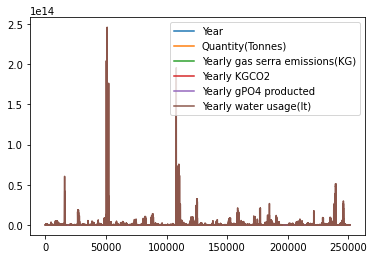

In [500]:
columns = ["Area", "Item", "Element", "Year", "Quantity(Tonnes)", "Yearly gas serra emissions(KG)", "Yearly KGCO2", "Yearly gPO4 producted", "Yearly water usage(lt)"]
type_sorted_df = prodotti_tracciati_df.sort_values(by="Type").reset_index()

years_productions = type_sorted_df[[f"Y{i}" for i in range(1961, 2014)]] * 1000
types = type_sorted_df["Type"].to_list() # ordinato in base a come si trova
areas = type_sorted_df["Area"].to_list() # ordinato in base a come si trova
element = type_sorted_df["Element"].to_list() # ordinato in base a come si trova

years_to_add = [f"{i}" for i in range(1961, 2014)]
record_for_df = list()

# Creazione di un nuovo df anche con lo stesso nome che gli hai dato che poi andrò man mano riempito
for i in range(len(types)):
     for j in range(53):
          year_production =  years_productions.iloc[i, j]
          year = 1961 + j
          yearly_gas_serra_emission = 0
          yearly_KGCO2 = 0
          yearly_gPO4 = 0
          yearly_water_usage = 0

          if types[i] in CO2eq_KG_dict:
               yearly_gas_serra_emission = (year_production * 1000) * CO2eq_KG_dict[types[i]]
          if types[i] in CO2_KG_dict:
               yearly_KGCO2 = (year_production * 1000) * CO2_KG_dict[types[i]]
          if types[i] in gPO4_dict:
               yearly_gPO4 = (year_production * 1000) * gPO4_dict[types[i]]
          if types[i] in water_usage_KG:
               yearly_water_usage = (year_production * 1000) * water_usage_KG[types[i]]
          
          record_for_df.append([areas[i], types[i], element[i], year, year_production, yearly_gas_serra_emission, yearly_KGCO2, yearly_gPO4, yearly_water_usage])

graphics_df = pd.DataFrame(record_for_df, columns=columns)
graphics_df = graphics_df.sort_values(by="Area").reset_index().drop(columns=["index"])


# Trasformazione dei dati
#### I dati per essere rappresentati correttamente hanno bisogno di essere fatti un certo andremo creerò un Dataframe che ha le seguenti colonne:
- **Area:** Corrisponde all'Area.
- **Item:** Il cibo/mangime che è stato prodotto.
- **Element:** Cibo o mangime.
- **Year:** L'anno in cui è stata generata quella quantità di prodotto.
- **Quantity:** Quantità prodotta.
- **Yearly gas serra emissions:** Gas serra emessi in un anno.
- **Yearly KGCO2:** Chili di CO2 rilasciati in quel anno.
- **Yearly gPO4 producted:** Quantità in grammi di gPO4 rilasciata annualmente.
- **Yearly water usage(lt):** Quantità di acqua usata per la produzione. 

In [ ]:
columns = ["Area", "Item", "Element", "Year", "Quantity(Tonnes)", "Yearly gas serra emissions(KG)", "Yearly KGCO2", "Yearly gPO4 producted", "Yearly water usage(lt)"]
record_for_df = list()
for index, record in Food_feed_df.iterrows():
     for i in range(1961, 2013):
          record_for_df.append([record["Area"], record["Type"], record["Element"], f"{i}", record[f"Y{i}"], 0, 0, 0, 0 ])

graphics_df = pd.DataFrame(record_for_df, columns=columns)
types = graphics_df["Item"].drop_duplicates().to_list()
serra_emissions_dict = dict()

emissioni_gas_serra = list() # Lista che conterrà le emissioni di gas serra in maniera ordinata
emissioni_CO2 = list() # Lista che conterrà tutte le emissioni di CO2 in maniera ordinata
eutrofizzazione = list() # Lista che conterrà informazioni relativa al rilascio di PO4
utilizzo_acqua = list() # Lista che conterrà quanta acqua viene usata per la produzione in maniera ordinata


# Velocizzare questa parte puoi creare una lista/serire che contiene gli elementi nella stessa posizione di dove si trovano normalmente cosi puoi andare semplicemente a moltiplicare vettore per vettore e velocizzare il tutto
def get_gas_serra_factor(_food_type):

     gas_serra = None


     if _food_type == "Wheat" or _food_type == "Rye":
          gas_serra = Food_Production_df.loc[Food_Production_df["Food product"] == "Wheat & Rye (Bread)", "Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)"]
     elif _food_type == "Berries" or _food_type == "Grapes":
          gas_serra = Food_Production_df.loc[Food_Production_df["Food product"] == "Berries & Grape (Bread)", "Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)"]
     elif _food_type == "Onions" or _food_type == "Leeks":
          gas_serra = Food_Production_df.loc[Food_Production_df["Food product"] == "Onions & Leeks", "Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)"]
     elif _food_type == "Lamb" or _food_type == "Mutton":
          gas_serra = Food_Production_df.loc[Food_Production_df["Food product"] == "Lamb & Mutton", "Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)"]
     else:
          gas_serra = Food_Production_df.loc[Food_Production_df["Food product"] == _food_type, "Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)"]

     if len(gas_serra) == 0:
          gas_serra = 0
     else:
          gas_serra = gas_serra.to_list()[0]

     return gas_serra


for _food_type in types:  
     if _food_type not in serra_emissions_dict.keys():
          if len(Food_Production_df.loc[Food_Production_df["Food product"] == _food_type, "Kg producted x 1000kcal"]) == 0:
               serra_emissions_dict[_food_type] = (get_gas_serra_factor(_food_type), 0)
          else:
               serra_emissions_dict[_food_type] = (get_gas_serra_factor(_food_type), Food_Production_df.loc[Food_Production_df["Food product"] == _food_type, "Kg producted x 1000kcal"].to_list()[0])

# Provare ad implementare con un modo più rapido
for index, record in graphics_df.iterrows():
     _food_type = record["Item"]
     if _food_type in serra_emissions_dict:
          if serra_emissions_dict[_food_type][1] != 0:
               emissioni_gas_serra.append(((record["Quantity(Tonnes)"] * 1000)) * (serra_emissions_dict[_food_type][0]/serra_emissions_dict[_food_type][1]))
          else: 
               emissioni_gas_serra.append(np.NaN)
          
graphics_df["Yearly gas serra emissions(KG)"] = emissioni_gas_serra
graphics_df = graphics_df.sort_values(by="Item", ascending=True) # Ovviamente non droppa i nan inplace
graphics_df = graphics_df.reset_index()
graphics_df




,index,Area,Item,Element,Year,Quantity(Tonnes),Yearly gas serra emissions(KG),Yearly KGCO2,Yearly gPO4 producted,Yearly water usage(lt)
0,152671,French Polynesia,Apples,Food,2012,3,139.75,0,0,0
1,150925,Zambia,Apples,Food,1982,0,0.00,0,0,0
2,150924,Zambia,Apples,Food,1981,0,0.00,0,0,0
3,150923,Zambia,Apples,Food,1980,0,0.00,0,0,0
4,150922,Zambia,Apples,Food,1979,0,0.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...
305339,49579,Japan,Wine,Food,1984,95,NaN,0,0,0
305340,49578,Japan,Wine,Food,1983,107,NaN,0,0,0
305341,49577,Japan,Wine,Food,1982,98,NaN,0,0,0
305342,49588,Japan,Wine,Food,1993,117,NaN,0,0,0


#### Inserimento inquinamento da CO2 in KG

In [ ]:
Food_feed_CO2_dict = dict()
for key in Food_types_CO2KG_dict.keys():
     Food_feed_CO2_dict[key] = Food_types_CO2KG_dict[key]
for key in Feed_types_CO2KG_dict.keys():
     Food_feed_CO2_dict[key] = Feed_types_CO2KG_dict[key]

def get_CO2_producted():
     ret = list()
     value_needed = graphics_df.groupby("Item").count().reset_index()[["Item", "Area"]]
     # Questo lo devi migliorare perche non va a considerare che ci possono essere dei valori che vanno in accoppiata tipo "Wheat & Rye"
     for index, value in value_needed.iterrows():
          CO2_multiplier = 0
          if len(Food_Production_df.loc[Food_Production_df["Food product"] == value["Item"], "Total_emissions"]) != 0:
               CO2_multiplier = Food_Production_df.loc[Food_Production_df["Food product"] == value["Item"], "Total_emissions"].to_list()[0]
          else:
               CO2_multiplier = 0

          for i in range(value["Area"]):
               ret.append(CO2_multiplier)
     return ret

def get_gPO4_producted():
     ret = list()
     value_needed = graphics_df.groupby("Item").count().reset_index()[["Item", "Area"]]

     for index, value in value_needed.iterrows():
          gPO4_multiplier = 0
          if len(Food_Production_df.loc[Food_Production_df["Food product"] == value["Item"], "Eutrophying emissions per kilogram (gPO₄eq per kilogram)"]) != 0:
               gPO4_multiplier = Food_Production_df.loc[Food_Production_df["Food product"] == value["Item"], "Eutrophying emissions per kilogram (gPO₄eq per kilogram)"].to_list()[0]
          else:
               gPO4_multiplier = 0

          for i in range(value["Area"]):
               ret.append(gPO4_multiplier)

     return ret

def get_yearly_water_usage():
     ret = list()
     value_needed = graphics_df.groupby("Item").count().reset_index()[["Item", "Area"]]

     for index, value in value_needed.iterrows():
          gPO4_multiplier = 0
          if len(Food_Production_df.loc[Food_Production_df["Food product"] == value["Item"], "Freshwater withdrawals per kilogram (liters per kilogram)"]) != 0:
               gPO4_multiplier = Food_Production_df.loc[Food_Production_df["Food product"] == value["Item"], "Freshwater withdrawals per kilogram (liters per kilogram)"].to_list()[0]
          else:
               gPO4_multiplier = 0

          for i in range(value["Area"]):
               ret.append(gPO4_multiplier)

     return ret     

     

graphics_df["Yearly KGCO2"] = (graphics_df["Quantity(Tonnes)"] * 1000) * get_CO2_producted()
graphics_df["Yearly gPO4 producted"] = (graphics_df["Quantity(Tonnes)"] * 1000) * get_gPO4_producted()
graphics_df["Yearly water usage(lt)"] = (graphics_df["Quantity(Tonnes)"] * 1000) * get_yearly_water_usage()
graphics_df

,index,Area,Item,Element,Year,Quantity(Tonnes),Yearly gas serra emissions(KG),Yearly KGCO2,Yearly gPO4 producted,Yearly water usage(lt)
0,152671,French Polynesia,Apples,Food,2012,3,3000.0,900.0,4350.0,540300.0
1,150925,Zambia,Apples,Food,1982,0,0.0,0.0,0.0,0.0
2,150924,Zambia,Apples,Food,1981,0,0.0,0.0,0.0,0.0
3,150923,Zambia,Apples,Food,1980,0,0.0,0.0,0.0,0.0
4,150922,Zambia,Apples,Food,1979,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
305339,49579,Japan,Wine,Food,1984,95,NaN,133000.0,434150.0,7495500.0
305340,49578,Japan,Wine,Food,1983,107,NaN,149800.0,488990.0,8442300.0
305341,49577,Japan,Wine,Food,1982,98,NaN,137200.0,447860.0,7732200.0
305342,49588,Japan,Wine,Food,1993,117,NaN,163800.0,534690.0,9231300.0


# Produzione anno per anno
#### Grafico che mostra l'incremento della produzione mondiale anno per anno di cibi e mangimi.

In [ ]:
# Addattare i dati per mostrare l'incremento della produzione anno per anno


# Grafico della produzione di CO2 prodotta anno per anno
#### Grafico che mostra l'incremento della produzione di CO2 anno per anno

In [ ]:
# Adattare df per mostrare la produzione di CO2 anno per anno

# Grafico eutrofizzazione anno per anno
#### Grafico che mostra l'incremento di eutrofizzazione anno per anno

In [ ]:
# Adattare i dati per mostrare il grafico dell'eutrofizzazione

# Grafico aumento gas serra
#### Grafico che mostra l'aumento dei gas serra anno per anno

In [ ]:
# Adattare i dati per mostrare il gafico dei gas serra

# Grafico con l'estrapolazione delle risorse d'aqua anno per anno
#### Grafico che mostra l'aumento delle risorse d'acqua richieste anno per anno

In [ ]:
# Adattare i dati per mostrare l'aumento delle risorse d'acqua anno per anno

# Confronto carni - vegetali
#### Grafico che mostra l'inquinamento di un tipo di alimento rispetto all'altro in relazione alla quantità che ne viene prodotta.

In [ ]:
# Adattare i dati per creare un grafico che mostri le differenze a livello di inquinamento tra prodotti animali e vegetali.